In [9]:
from datetime import datetime
import settings.config_movie_lens as cfg
import pandas as pd
import numpy as np

pd.options.display.max_rows = 500 #Changes the number of rows diplayed (default is 60)


preprocessed_dataset_folder = cfg.preprocessed_dataset_folder
individual_rs_strategy = cfg.individual_rs_strategy
aggregation_strategies = cfg.aggregation_strategies
recommendations_number = cfg.recommendations_number
individual_rs_validation_folds_k = cfg.individual_rs_validation_folds_k
group_rs_evaluation_folds_k = cfg.group_rs_evaluation_folds_k
evaluation_strategy = cfg.evaluation_strategy
metrics = cfg.metrics
group_types = cfg.group_types

display(cfg.dataset_folder,cfg.preprocessed_dataset_folder)

'ml-1m'

'preprocessed_dataset'

In [10]:
import pandas as pd
ratings_df = pd.read_csv(preprocessed_dataset_folder+"/ratings.csv")

import pickle

group_composition = pickle.load(open(preprocessed_dataset_folder+"/group_composition.pkl", "rb"))

ratings_df

,user,item,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
942220,6040,1091,1
942221,6040,1094,5
942222,6040,562,5
942223,6040,1096,4


## Train individual RS / Prepare groundtruth
Takes long time, only needed if you don't have test_pred_df file

In [3]:
# import pickle
# import os
# from individual_rs.individual_rs import IndividualRS
# from utils.utility_functions import create_per_user_group_choices

# import warnings
# warnings.filterwarnings('ignore')
# # General pipeline

# # creating train-test folds
# # split stratified on the users 

# from sklearn.model_selection import StratifiedKFold
# import itertools

# if group_types == "SYNTHETIC":
#     print(datetime.now(), "Creating folds")
#     # skf = StratifiedKFold(n_splits=group_rs_evaluation_folds_k, random_state=None, shuffle=True)
#     skf = StratifiedKFold(n_splits=group_rs_evaluation_folds_k, random_state=42, shuffle=True)

#     print(datetime.now(), "Folds created!")
#     current_fold = 0
#     for train_index, test_index in skf.split(ratings_df, ratings_df['user']):
#         print(">>> Start processing fold: Train", len(train_index), "Test:", len(test_index))

#         # split train and test df
#         train_df = ratings_df.iloc[train_index]
#         test_df = ratings_df.iloc[test_index]

#         # getting user-items pairs in the training set
#         train_set_pairs = set(list(zip(train_df['user'].values,train_df['item'].values)))

#         # create test_complete_df with all the possible user-items pairs in the test_df
#         user_set = set(test_df['user'].values)
#         item_set = set(test_df['item'].values)
#         all_ui_values = list(itertools.product(user_set, item_set))
#         test_pred_df = pd.DataFrame(all_ui_values, columns=['user', 'item'])

#     #     print(datetime.now(), "Extended test df")
#     #     display(test_pred_df)

#         print(datetime.now(), "Train individual RS and get predictions")
#         # train individual rs and get predictions
#         test_pred_df = IndividualRS.train_individual_rs_and_get_predictions(train_df, test_pred_df)

#         #correction for train set records (assuming repeated recommendations provide no value, therefore predicted_rating=0)
#         train_set_pairs = train_set_pairs.intersection(set(all_ui_values))
#         test_pred_df.set_index(["user","item"], inplace=True)
#         test_pred_df.loc[train_set_pairs,"predicted_rating"] = 0.0
#         test_pred_df.reset_index(inplace=True)

#         path_to_fold = preprocessed_dataset_folder+"/fold_"+str(current_fold)

#         if not os.path.exists(path_to_fold):
#             os.mkdir(path_to_fold)

#         pickle.dump(train_df, open(path_to_fold+"/train_df.pkl", "wb"))
#         pickle.dump(test_df, open(path_to_fold+"/test_df.pkl", "wb"))
#         pickle.dump(test_pred_df, open(path_to_fold+"/test_pred_df.pkl", "wb"))

#         current_fold = current_fold + 1

# else:
#     print("ERROR: incorrect config file!")
# print(datetime.now(), "Done!")
# test_pred_df


In [4]:
path_to_fold = preprocessed_dataset_folder+"/fold_0" # only fold_0 for testing for now
test_pred_df = pickle.load(open(path_to_fold+"/test_pred_df.pkl", "rb"))

test_pred_df

,user,item,predicted_rating
0,1,1,0.000000
1,1,2,4.190777
2,1,3,3.755889
3,1,4,3.612580
4,1,5,3.888539
...,...,...,...
12194755,6040,3937,2.786423
12194756,6040,3946,2.261388
12194757,6040,3948,3.462167
12194758,6040,3949,4.558693


# Create top-k restricted test_pred_df
Takes long time, only needed if you don't have the topk files

In [5]:
# if cfg.top_k:
#     for option in cfg.top_k:
#         print(option)
#         # extract group info
#         # warning for topk being lower than recommendation number
#         unique_users = test_pred_df['user'].unique() # get all unique users in the group_ratings df# get all unique users in test_pred_df
#         topk_test_pred_df = pd.DataFrame()
#         for user in unique_users: # collect top-k of each user and add to new topk_test_pred_df
#             # pad the other items with 0 except the topk head
#             user_ratings = test_pred_df.loc[test_pred_df['user'] == user].sort_values(by="predicted_rating", ascending=False) # Pega somente dados do user e ordena por predicted_rating
#             user_ratings.iloc[option:, [2]] = 0 # Zera tudo menos o topk
#             topk_test_pred_df = topk_test_pred_df.append(user_ratings)
            
#         pickle.dump(topk_test_pred_df, open(path_to_fold+"/topk"+str(option)+"_test_pred_df.pkl", "wb")) # dump new topk_test_pred_df to pickle file in folder
#         print(topk_test_pred_df)

In [16]:
df1 = pickle.load(open(path_to_fold+"/topk21_test_pred_df.pkl", "rb"))
df1.iloc[2010:2050, :]

,user,item,predicted_rating
1211,1,2340,0.000000
38,1,48,0.000000
339,1,608,0.000000
549,1,1097,0.000000
1220,1,2355,0.000000
334,1,595,0.000000
328,1,588,0.000000
1256,1,2398,0.000000
0,1,1,0.000000
2435,2,858,4.667113


# Construct group recommendations
Takes a bit of time, only needed if you don't have the group_recommendations files

In [7]:
from utils.utility_functions import generate_group_recommendations_forall_groups

import os
import warnings
warnings.filterwarnings('ignore')
lst = os.listdir(preprocessed_dataset_folder)
folds = [i for i in lst if (os.path.isdir(preprocessed_dataset_folder+"/"+i) and i.startswith("fold"))]
folds = ["fold_0"] # Only do fold_0, quicker testing

for f in folds:
    current_fold = int(f.replace("fold_",""))
    path_to_fold = preprocessed_dataset_folder+"/"+f
    
    if group_types == "SYNTHETIC":
        train_df = pickle.load(open(path_to_fold+"/train_df.pkl", "rb"))
        test_df = pickle.load(open(path_to_fold+"/test_df.pkl", "rb"))
        test_pred_df = pickle.load(open(path_to_fold+"/test_pred_df.pkl", "rb"))
    else:
        print("ERROR: incorrect config file!")     

    print(datetime.now(), f+": Generate GRS for all the aggregation strategies and all the groups")
    # - generate the recommendations for all the aggregation strategies and all the groups
    # print(group_composition)
    
    if cfg.top_k:
        for option in cfg.top_k: 
            topk_test_pred_df = pickle.load(open(path_to_fold+"/topk"+str(option)+"_test_pred_df.pkl", "rb"))
            group_recommendations = generate_group_recommendations_forall_groups(topk_test_pred_df, group_composition, cfg.recommendations_number)
            print(datetime.now(), f+": Done")
            
            pickle.dump(group_recommendations, open(path_to_fold+"/topk"+str(option)+"_group_recommendations.pkl", "wb"))
    else:
        group_recommendations = generate_group_recommendations_forall_groups(test_pred_df, group_composition, cfg.recommendations_number)
        print(datetime.now(), f+": Done")
        
        pickle.dump(group_recommendations, open(path_to_fold+"/group_recommendations.pkl", "wb"))

2023-03-06 19:26:33.034641 fold_0: Generate GRS for all the aggregation strategies and all the groups
It reached generate_group_recommendations_forall_groups, group 0
It reached generate_group_recommendations_forall_groups, group 1
It reached generate_group_recommendations_forall_groups, group 2
It reached generate_group_recommendations_forall_groups, group 3
It reached generate_group_recommendations_forall_groups, group 4
It reached generate_group_recommendations_forall_groups, group 5
It reached generate_group_recommendations_forall_groups, group 6
It reached generate_group_recommendations_forall_groups, group 7
It reached generate_group_recommendations_forall_groups, group 8
It reached generate_group_recommendations_forall_groups, group 9
It reached generate_group_recommendations_forall_groups, group 10
It reached generate_group_recommendations_forall_groups, group 11
It reached generate_group_recommendations_forall_groups, group 12
It reached generate_group_recommendations_forall_g

In [19]:
df1 = pickle.load(open(path_to_fold+"/topk1_group_recommendations.pkl", "rb"))
df1

{0: {'ADD': [923, 2019, 1, 2549, 2540, 2541, 2542, 2546, 2548, 2550],
  'MUL': [1, 2535, 2558, 2555, 2554, 2553, 2551, 2550, 2549, 2548],
  'LMS': [1, 2535, 2558, 2555, 2554, 2553, 2551, 2550, 2549, 2548],
  'MPL': [923, 2019, 1, 2549, 2540, 2541, 2542, 2546, 2548, 2550],
  'GFAR': [4, 95, 105, 227, 328, 407, 410, 500, 533, 537],
  'EPFuzzDA': [923, 2019, 1, 2, 3, 4, 5, 6, 7, 9],
  'FAI': [2019, 923, 423, 537, 2551, 786, 4, 2532, 1689, 533],
  'BDC': [923, 2019, 1, 2549, 2540, 2541, 2542, 2546, 2548, 2550],
  'AVGNM': [923, 2019]},
 1: {'ADD': [750, 1148, 2640, 2561, 2558, 2555, 2554, 2553, 2551, 2550],
  'MUL': [1, 2535, 2558, 2555, 2554, 2553, 2551, 2550, 2549, 2548],
  'LMS': [1, 2535, 2558, 2555, 2554, 2553, 2551, 2550, 2549, 2548],
  'MPL': [750, 1148, 2640, 2561, 2558, 2555, 2554, 2553, 2551, 2550],
  'GFAR': [434, 237, 1346, 504, 1487, 1327, 1690, 1801, 2116, 2002],
  'EPFuzzDA': [750, 1148, 1, 2, 3, 4, 5, 6, 7, 9],
  'FAI': [750, 1148, 338, 2975, 3785, 1487, 3024, 2429, 434, 38

# Evaluate group recommendations
### Define evaluation variants

In [9]:
evaluation_variants = [
   {
       "evaluation_strategy": "COUPLED",
       "binarize_feedback": True,
       "binarize_feedback_positive_threshold": 4.0,
       "inverse_propensity_debiasing": False,
       "inverse_propensity_gamma": 0.0
   },
   {
        "evaluation_strategy": "DECOUPLED",
        "binarize_feedback": True,
        "binarize_feedback_positive_threshold": 4.0,
        "feedback_polarity_debiasing": 0.0    
    },
#    {
#        "evaluation_strategy": "COUPLED",
#        "binarize_feedback": True,
#        "binarize_feedback_positive_threshold": 4.0,
#        "inverse_propensity_debiasing": True,
#        "inverse_propensity_gamma": 0.5
#    },
#    {
#        "evaluation_strategy": "COUPLED",
#        "binarize_feedback": False,
#        "inverse_propensity_debiasing": False,
#        "inverse_propensity_gamma": 0.0
#    },
#    {
#        "evaluation_strategy": "COUPLED",
#        "binarize_feedback": False,
#        "inverse_propensity_debiasing": True,
#        "inverse_propensity_gamma": 0.5
#    },    
]
# evaluation_variants = [
#     {
#         "evaluation_strategy": "DECOUPLED",
#         "binarize_feedback": True,
#         "binarize_feedback_positive_threshold": 4.0,
#         "feedback_polarity_debiasing": 0.0    
#     },
#     {
#         "evaluation_strategy": "DECOUPLED",
#         "binarize_feedback": True,
#         "binarize_feedback_positive_threshold": 3.0,
#         "feedback_polarity_debiasing": 0.0    
#     },    
#     {
#         "evaluation_strategy": "DECOUPLED",
#         "binarize_feedback": False,
#         "binarize_feedback_positive_threshold": 4.0,
#         "feedback_polarity_debiasing": 0.0
#     },
#     {
#         "evaluation_strategy": "DECOUPLED",
#         "binarize_feedback": False,
#         "binarize_feedback_positive_threshold": 4.0,
#         "feedback_polarity_debiasing": -2.0   
#     },
#     {
#         "evaluation_strategy": "DECOUPLED",
#         "binarize_feedback": False,
#         "binarize_feedback_positive_threshold": 4.0,
#         "feedback_polarity_debiasing": -4.0
#     },    
# ]

This next section must be altered according to which file you want it to source the recommendations from. Assuming you have multiple topk files to choose from, define here which one will be used. Currently, it CANNOT automatically iterate through all the topk files in the cfg.topk variable, you have to pick which to use manually.

In [10]:
import os
import time
import json
from utils.utility_functions import calculate_inverse_propensity_score,calculate_inverse_propensity_score_user_normalization
from utils.utility_functions import evaluate_group_recommendations_forall_groups

import warnings
warnings.filterwarnings('ignore')

lst = os.listdir(preprocessed_dataset_folder)
folds = [i for i in lst if (os.path.isdir(preprocessed_dataset_folder+"/"+i) and i.startswith("fold"))]
folds = ["fold_0"]
current_topk = 1 # CHOOSE HERE which topk file it will use. If 0, then it won't use a topk file. MUST BE one of the topk options in cfg.top_k

for ev in evaluation_variants:
    for i in ev.keys():
        setattr(cfg, i, ev[i])

    evaluations = list()
    for f in folds:
        current_fold = int(f.replace("fold_",""))
        path_to_fold = preprocessed_dataset_folder+"/"+f
        
        if group_types == "SYNTHETIC":
            train_df = pickle.load(open(path_to_fold+"/train_df.pkl", "rb"))
            test_df = pickle.load(open(path_to_fold+"/test_df.pkl", "rb"))
            test_pred_df = pickle.load(open(path_to_fold+"/test_pred_df.pkl", "rb"))
            topk_test_pred_df = pickle.load(open(path_to_fold+"/topk"+str(current_topk)+"_test_pred_df.pkl", "rb")) # rename it here for the correct topk file you want
        else:
            print("ERROR: incorrect config file!")  
        
        if current_topk > 0:
            group_recommendations = pickle.load(open(path_to_fold+"/topk"+str(current_topk)+"_group_recommendations.pkl", "rb"))
        else:
            group_recommendations = pickle.load(open(path_to_fold+"/group_recommendations.pkl", "rb"))

        # - evaluate the recommendations
        if cfg.evaluation_strategy == "COUPLED":
            ground_truth = test_df
        else:
            if current_topk > 0:
                ground_truth = topk_test_pred_df.rename(columns={"predicted_rating": "rating"}, errors="raise")
            else:
                ground_truth = test_pred_df.rename(columns={"predicted_rating": "rating"}, errors="raise")

        if cfg.inverse_propensity_debiasing == True and cfg.evaluation_strategy == "COUPLED":
            propensity_per_item = calculate_inverse_propensity_score(ratings_df, train_df, cfg.inverse_propensity_gamma)
            per_user_propensity_normalization_term = calculate_inverse_propensity_score_user_normalization(propensity_per_item, test_df)
        else:
            #dummies to simplify downstream code
            propensity_per_item = pd.Series({"propensity_score":1.0})
            per_user_propensity_normalization_term = None

        print(datetime.now(), f+": Evaluate Group recommendations")
        # modify the evaluation code to handle change for top-k restricted items
        # also let the option of this, unchanged
        fold_group_evaluations = evaluate_group_recommendations_forall_groups(
            ground_truth, 
            group_recommendations, 
            group_composition, 
            propensity_per_item, 
            per_user_propensity_normalization_term,
            current_fold,
            cfg.evaluation_ground_truth,            
            cfg.binarize_feedback_positive_threshold,
            cfg.binarize_feedback,
            cfg.feedback_polarity_debiasing 
        )
        print(datetime.now(), "Fold Evaluation DONE")
        #display(fold_group_evaluations)

        evaluations = evaluations + fold_group_evaluations
        #current_fold = current_fold + 1
    eval_df = pd.DataFrame.from_records(evaluations)  
    
    
    
    path_to_eval_folder = preprocessed_dataset_folder+"/eval_"+str(time.time())
    eval_parameters = {key:cfg.__dict__[key] for key in cfg.__dict__.keys() if not (key.startswith('__') or key.startswith('_'))}

    if not os.path.exists(path_to_eval_folder):
        os.mkdir(path_to_eval_folder)
        
    
    pickle.dump(eval_parameters, open(path_to_eval_folder+"/eval_parameters.pkl", "wb"))    
    pickle.dump(eval_df, open(path_to_eval_folder+"/eval_df.pkl", "wb"))
    pickle.dump(group_composition, open(path_to_eval_folder+"/group_composition.pkl", "wb"))
    #for human readability
    with open(path_to_eval_folder+"/eval_parameters.json" , "w" ) as write:
        json.dump( eval_parameters , write )        

2023-03-03 11:19:07.328121 fold_0: Evaluate Group recommendations
2023-03-03 11:19:29.319024 Fold Evaluation DONE
2023-03-03 11:19:29.498053 fold_0: Evaluate Group recommendations
2023-03-03 11:19:53.192289 Fold Evaluation DONE


# Show how individual evaluation runs differs from each other
- only show parameters with non-uniform values

In [11]:
import os
import time
import json
lst = os.listdir(preprocessed_dataset_folder)
results = [i for i in lst if (os.path.isdir(preprocessed_dataset_folder+"/"+i) and i.startswith("eval"))]
list(enumerate(results))

[(0, 'eval_1677853169.3400235'), (1, 'eval_1677853193.2112906')]

In [12]:
lst = os.listdir(preprocessed_dataset_folder)
results = [i for i in lst if (os.path.isdir(preprocessed_dataset_folder+"/"+i) and i.startswith("eval"))]

eval_params_list = []
for r in results:
    path_to_eval_folder = preprocessed_dataset_folder + "/" + r
    eval_params = pickle.load(open(path_to_eval_folder+"/eval_parameters.pkl", "rb"))
    eval_params_list.append(eval_params)

parameters_df = pd.DataFrame(eval_params_list)
parameters_df.index = results
keep_col = []
parameters_df = parameters_df.astype(str)
for c in parameters_df.columns:
    if len(parameters_df.loc[:,c].unique()) > 1:
        keep_col.append(True)
    else:
        keep_col.append(False)
parameters_df_relevant = parameters_df.loc[:,keep_col]  
parameters_df_relevant

,evaluation_strategy,feedback_polarity_debiasing
eval_1677853169.3400235,COUPLED,-3.0
eval_1677853193.2112906,DECOUPLED,0.0


# Visualize results from individual evaluation runs

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#select which evaluation run to display
res_folder = parameters_df.index[1]
path_to_eval_folder = preprocessed_dataset_folder + "/" + res_folder

eval_parameters = pickle.load(open(path_to_eval_folder+"/eval_parameters.pkl", "rb"))
eval_df = pickle.load(open(path_to_eval_folder+"/eval_df.pkl", "rb"))
group_composition = pickle.load(open(path_to_eval_folder+"/group_composition.pkl", "rb"))

In [19]:
#add / remove metrics considered for evaluation
metric_whitelist = ["NDCG","DCG","DFH","Recall","BoundedRecall","zRecall","MRR"]
eval_df = eval_df.loc[eval_df.metric.isin(metric_whitelist)]


### Depict overall (mean) results across all groups

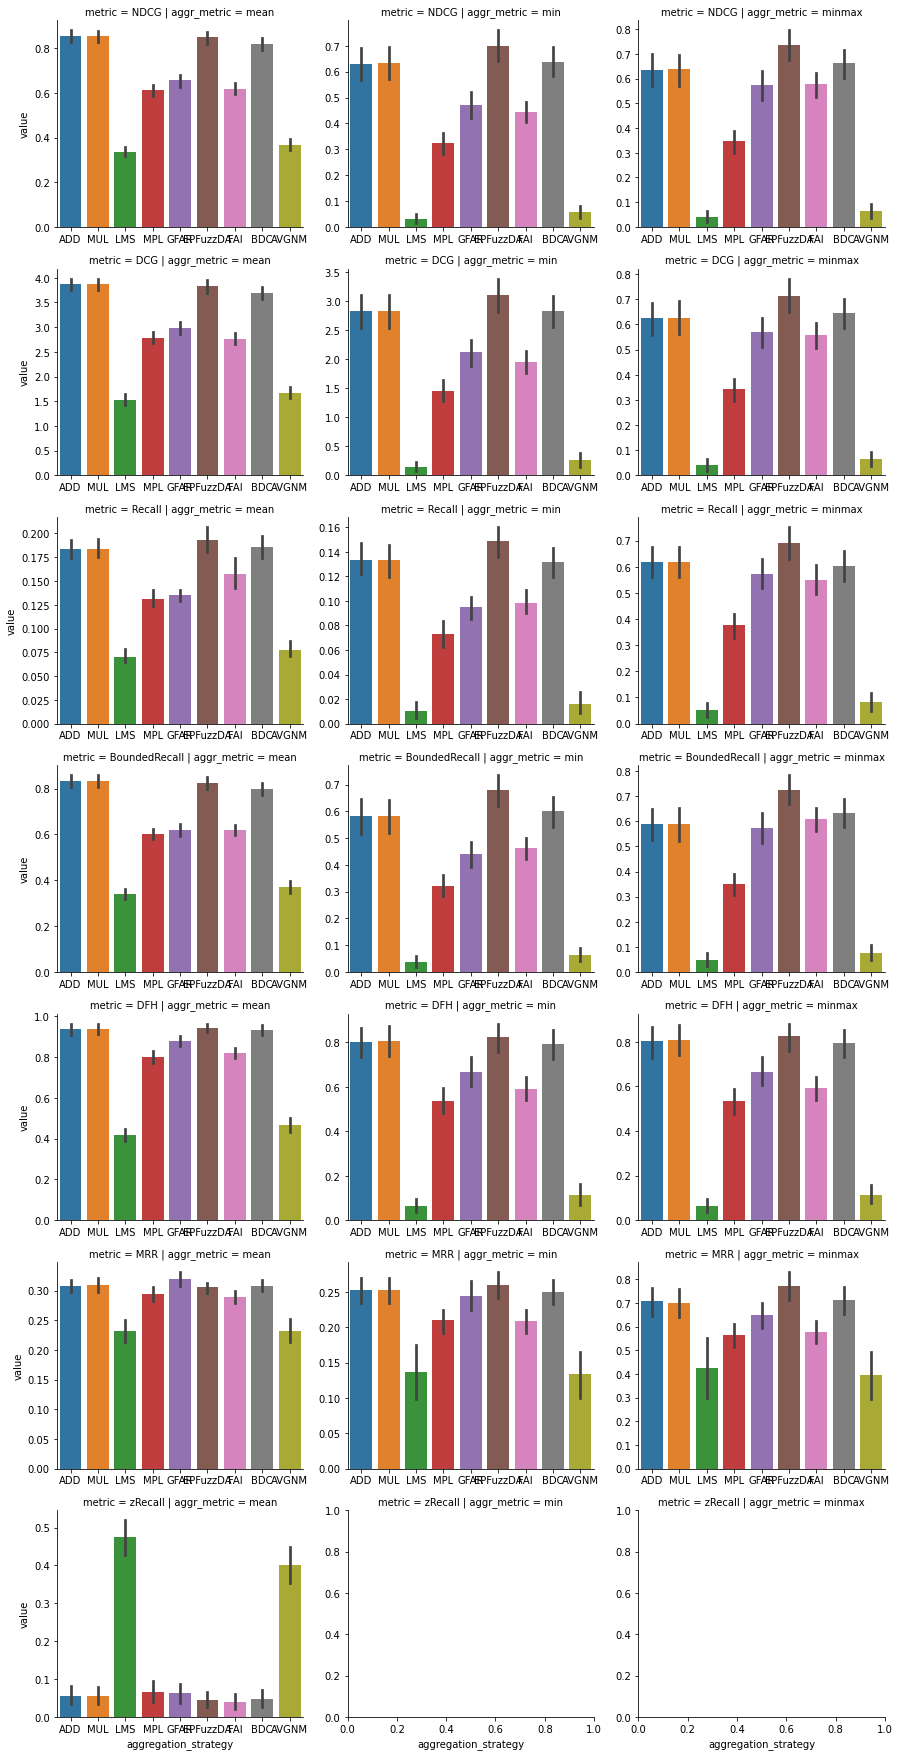

In [20]:
all_group_res = eval_df.groupby(['metric', 'aggr_metric', 'aggregation_strategy']).mean().reset_index()

g = sns.catplot(data=eval_df, row="metric", col="aggr_metric", 
                   x="aggregation_strategy", y="value", sharex=False, sharey=False,
                   kind="bar",  height=3.5, aspect=1.2)

In [17]:
group_composition_DF = pd.DataFrame(group_composition).T
eval_df_with_group_info = group_composition_DF.join(eval_df.set_index("group_id"))
eval_df_with_group_info.head()

,group_size,group_similarity,group_members,metric,aggr_metric,value,aggregation_strategy,current_fold
0,2,random,"[4805, 5428]",NDCG,mean,0.047394,ADD,0
0,2,random,"[4805, 5428]",NDCG,min,0.000000,ADD,0
0,2,random,"[4805, 5428]",NDCG,minmax,0.000000,ADD,0
0,2,random,"[4805, 5428]",DCG,mean,0.215338,ADD,0
0,2,random,"[4805, 5428]",DCG,min,0.000000,ADD,0


### Metric variance per group size; keeping the aggregation strategies visible

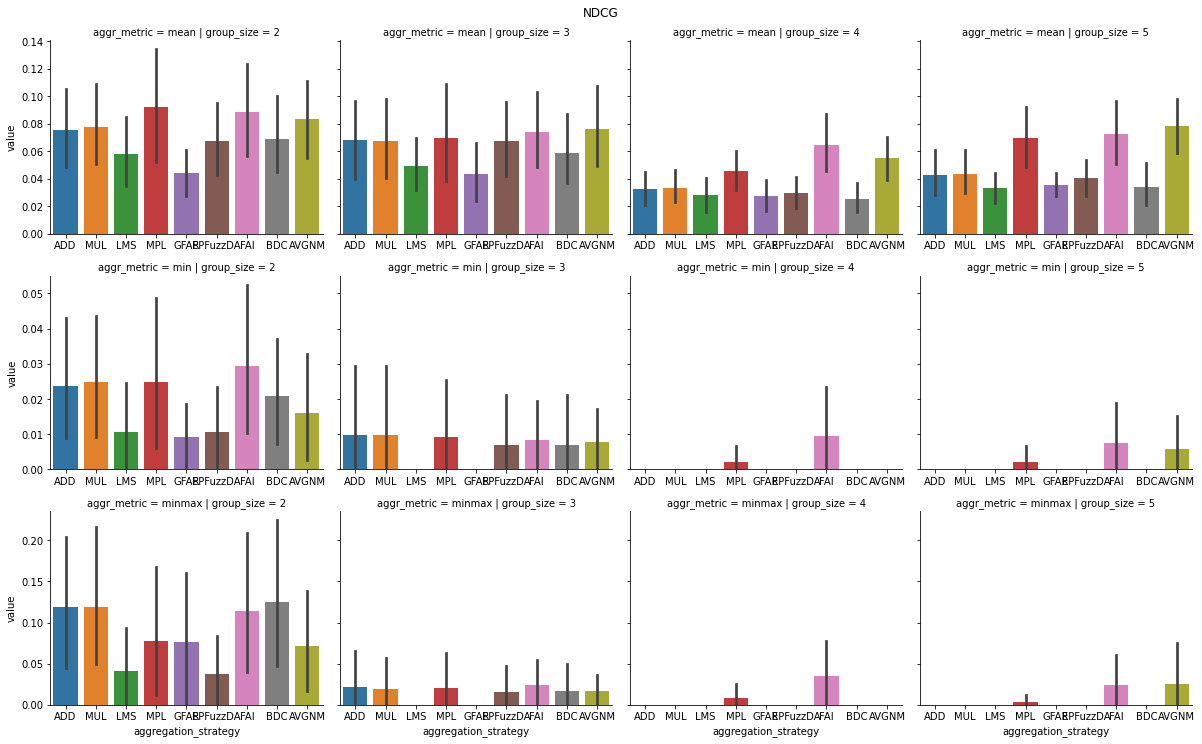

In [18]:
metric = "NDCG"
g = sns.catplot(data=eval_df_with_group_info.loc[eval_df_with_group_info.metric==metric], col="group_size", row="aggr_metric", 
                   x="aggregation_strategy", y="value", sharex=False, sharey="row",
                   kind="bar",  height=3.5, aspect=1.2)
plt.suptitle(metric)
plt.tight_layout()


### Metric variance per group size; merging all aggregation strategies

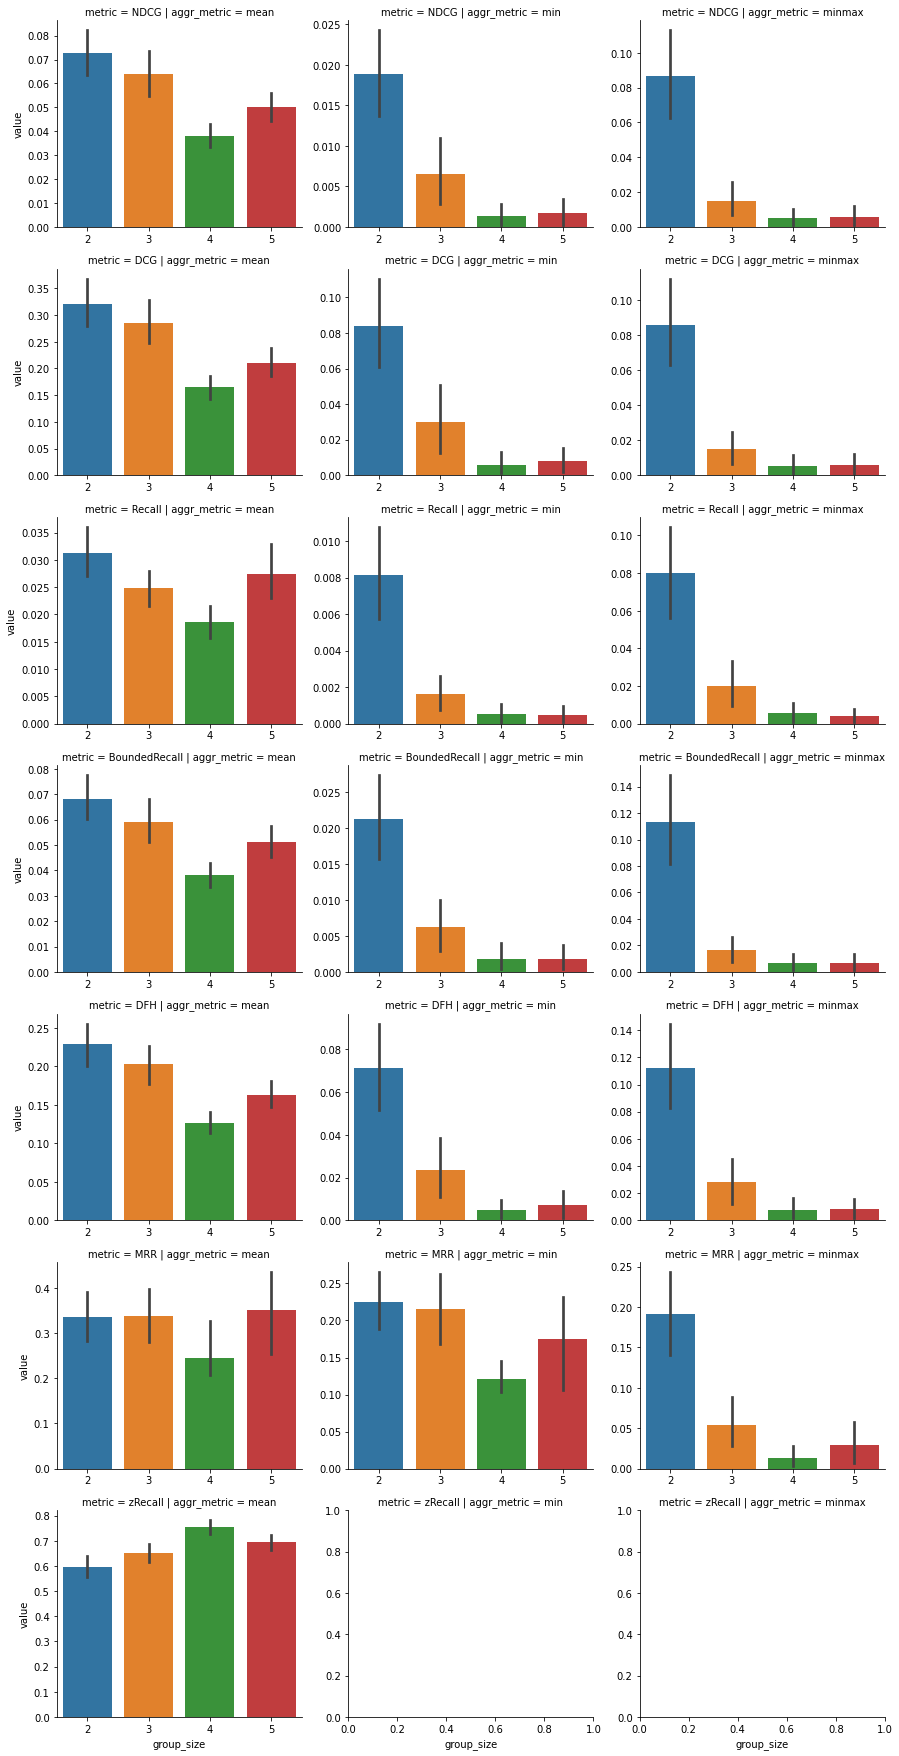

In [19]:
g = sns.catplot(data=eval_df_with_group_info, row="metric", col="aggr_metric", 
                   x="group_size", y="value", sharex=False, sharey=False,
                   kind="bar",  height=3.5, aspect=1.2)


### Metric variance per group size and group type; merging all aggregation strategies

In [ ]:
metric = "NDCG"
g = sns.catplot(data=eval_df_with_group_info.loc[eval_df_with_group_info.metric==metric], hue="group_similarity", col="aggr_metric", 
                   x="group_size", y="value", sharex=False, sharey="row",
                   kind="bar",  height=3.5, aspect=1.2)

### Depict distribution of per-group values for all metrics

In [ ]:
g = sns.catplot(data=eval_df, row="metric", col="aggr_metric", 
                   x="aggregation_strategy", y="value", sharex=False, sharey=False,
                   kind="boxen",  height=3.5, aspect=1.2)

In [ ]:
#group_folds = eval_df.groupby(['metric', 'aggr_metric', 'aggregation_strategy', 'group_id']).mean()
#display(group_folds['value'].reset_index().sort_values(by='group_id'))

In [ ]:
#eval_df.groupby(['metric', 'aggr_metric', 'aggregation_strategy']).mean().head(50)

# Compare results of multiple evaluation runs
### Collect all results and extend eval_df with relevant evaluation parameters

In [ ]:
#get all evaluation runs specified in valid_rows
def get_valid_evaluation_data(valid_rows):
    eval_df_list = []
    for res in valid_rows:
        path_to_eval_folder = preprocessed_dataset_folder + "/" + res
        eval_df = pickle.load(open(path_to_eval_folder+"/eval_df.pkl", "rb"))    
        for c in parameters_df_relevant.columns:
            eval_df[c]=parameters_df_relevant.loc[res,c]
        eval_df_list.append(eval_df)

    eval_df_concat = pd.concat(eval_df_list)
    return eval_df_concat

In [ ]:
#select only those evaluation runs we consider interesting
valid_rows = parameters_df_relevant.index[:4]
parameters_df_relevant.loc[valid_rows]

In [ ]:
eval_df_concat = get_valid_evaluation_data(valid_rows)
eval_df_concat.head(3)

### Coupled evaluation: effect of feedback binarization and inverse propensity debiasing

In [ ]:
metric = "DCG"
g = sns.catplot(data=eval_df_concat.loc[eval_df_concat.metric==metric], x="binarize_feedback_positive_threshold", 
                col="aggr_metric", 
                hue="aggregation_strategy", y="value", sharex="col", sharey=False,
                kind="bar",  height=3.5, aspect=1.2)

In [ ]:
#select only those evaluation runs we consider interesting
valid_rows = parameters_df_relevant.index[[1,4,5,6,7]]
eval_df_concat = get_valid_evaluation_data(valid_rows)
parameters_df_relevant.loc[valid_rows]

In [ ]:
metric = "DCG"
g = sns.catplot(data=eval_df_concat.loc[eval_df_concat.metric==metric],  
                col="aggr_metric", hue="inverse_propensity_gamma", 
                x="aggregation_strategy", y="value", sharex=False, sharey=False,
                kind="bar",  height=3.5, aspect=1.2)

In [ ]:
valid_rows = parameters_df_relevant.index[[4,5,6,7]]
eval_df_concat = get_valid_evaluation_data(valid_rows)
metric = "DCG"
g = sns.catplot(data=eval_df_concat.loc[eval_df_concat.metric==metric],  
                col="aggr_metric", hue="inverse_propensity_gamma", 
                x="aggregation_strategy", y="value", sharex=False, sharey=False,
                kind="bar",  height=3.5, aspect=1.2)

### Decoupled evaluation: effect of polarity debiasing

In [ ]:
valid_rows = parameters_df_relevant.index[11:15]
eval_df_concat = get_valid_evaluation_data(valid_rows)
parameters_df_relevant.loc[valid_rows]

In [ ]:
metric = "NDCG"
g = sns.catplot(data=eval_df_concat.loc[eval_df_concat.metric==metric], x="feedback_polarity_debiasing", 
                col="aggr_metric", 
                hue="aggregation_strategy", y="value", sharex=False, sharey="row",
                kind="bar",  height=3.5, aspect=1.2)

In [ ]:
valid_rows = parameters_df_relevant.index[[10,15,16]]
eval_df_concat = get_valid_evaluation_data(valid_rows)
parameters_df_relevant.loc[valid_rows]

In [ ]:
metric = "NDCG"
g = sns.catplot(data=eval_df_concat.loc[eval_df_concat.metric==metric], x="binarize_feedback_positive_threshold", 
                col="aggr_metric", 
                hue="aggregation_strategy", y="value", sharex=False, sharey=False,
                kind="bar",  height=3.5, aspect=1.2)